# Analyzing molecular dynamics simulations

Authors:
- Mareike Leja, 2020/21, Internship at [Volkamer Lab, Charité](https://volkamerlab.org/)
- David Schaller, 2020/21, [Volkamer Lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

In this talktorial, we will introduce methods for the analysis of molecular dynamics (MD) simulations. We will work with a longer simulation (1ns,100 frames) generated with talktorial T019 (!note, add proper reference!) on the EGFR kinase bound to inhibitor 03P. The introduced methods include animated visualization, alignment, RMSD calculation as well as distance and hydrogen bond analysis.

### Contents in *Theory*

- MD simulations in the drug discovery process
- MD simulations vs static structures
- Enhanced sampling methods
- Analyzing MD simulations
  - Visualization
  - RMSD
  - Hydrogen bond analysis

### Contents in *Practical*

- Load and visualize the system
- Alignment
- RMSD of protein and ligand
  - RMSD over time
  - RMSD between frames
- Interaction analysis
  - Atomic distances
  - Hydrogen bond analysis

### References

Theoretical Background:

- Review on the impact of MD simulations in drug discovery ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))
- Review on force fields ([_J Chem Inf Model_ (2018), **58**(3), 565-578](https://doi.org/10.1021/acs.jcim.8b00042))
- Review on Hydrogen Bonding ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029))
- Guide to Molecular Interactions ([_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j))
- Wikipedia Article about ([Root-Mean-Square-Deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation))
- Repositories of [MDAnalysis](https://www.mdanalysis.org/) and [NGL View](https://github.com/arose/nglview)

## Theory

### MD simulations in the drug discovery process

During the past decades the interest in structure-based drug design was ever growing. The development of faster algorithms and architectures employing GPUs paved the way for Molecular dynamics (MD) simulations to becoming a routinelly applied computational tool in the drug discovery process. One of the main assets of MD simulations is the more accurate estimation of the drug-target recognition and the binding process. Nowadays, a diverse array of computational methods builds on top of MD simulations and provides tools for many challenges encountered during the process of designing, selecting and optimizing new drug candidates ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684)).

### MD simulations vs static structures

Static models of protein-drug complexes, like X-ray structures, allow for evaluating the binding mode of a lead candidate, which can be used to systematically suggest the syntesis of novel analogs to improve affinity and physiochemical properties. However, static structures cannot explain all phenomena of drug-target binding, since the numerous interactions observed between ligand, target and surroundings (e.g. solvent and/or membrane) cannot be described solely by the enthalpy of the current equilibrium state of the system. In contrast, forcefield-based MD simulations fully account for the structural flexibility of protein and ligand as well as for entropic contributions of drug binding. Thus, they allow for a more accurate estimation of binding affinity, the detection of conformational changes, the analysis of interaction geometries over time, and more ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684)).

### Analyzing MD simulations

Since, this talktorial is meant as an introduction to MD simulation and their analysis, we will perform basic analysis steps that give a first insight into the field. The results of a standard MD simulation are commonly saved in two file types. One file type describes the topology of the system, which informs about the simulated system, i.e. a defined set of atoms connected via bonds. The other file type holds the positions of the atoms over time. Loading both file types into a molecular visualization tool can be used to create an instance of the simulated system. In the MD Analysis library we are using, this system is called a *universe*.

#### Visualization

A universe containing a MD Simulation can be visualized as a whole, usually including animations. It allows for observation of conformational changes, fluctuations and binding/unbinding processes with the bare eye. 

![Model](images/model.gif)
Fig. 1: Visualization of MD Simulation of AdK, [NGL View Example](https://github.com/arose/nglview/blob/master/examples/mdanalysis.md)

#### RMSD

A more suffisticated method to track conformational changes is the calculation of the root-mean-square deviation (RMSD, [wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)). this method measures the deviation of atom positions compared to a reference set of atom positions. RMSD plots can be employed to depict the relative movement of whole proteins or their domains during folding or drug binding. Also, RMSD calculations can be used to compare computed docking configurations to known (i.e. crystallographic) binding poses to validate the docking protocol (!note: need to add a proper reference to the docking talktorial!).

For two, usually superimposed, sets of coordinates v and w with n atoms the RMSD is defined as follows:

$$RMSD(v,w) = \frac{1}{n} \sum_{i=1}^n \|v_i - w_i\|²$$

To differentiate flexible and stable portions of a protein in simulations, one can use the root-mean-square fluctuation (RMSF) calculation instead, which allows for visualization of the fluctuation of residues from their mean structure.

#### Hydrogen bond analysis

Non-covalent interations like hydrogen bonds are key-players in the formation of a ligand-protein complex ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029), [_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j)). Their attractive potential results from a partially positively charged hydrogen pointing to a partially negatively charged hydrogen bond acceptor atom, e.g. oxygen or nitrogen. The analysis of hydrogen bonds can give valuable insights into the stability of a ligand-protein complex and guide modification of a lead molecule to improve its activity. The strength of a hydrogen bond can be estimated by analyzing angles and distances between donor, hydrogen and acceptor atoms. A small distance and an angle close to 180° indicate a strong bond, while bigger distances and smaller angles point towards a weaker bond (Fig 2).

![H-Bonds](images/CADD_Hbonds.png)  
Fig. 2: Hydrogen Bond examples between a donor (red) and acceptor (blue) oxygen atom showing different bond angles and distances (arrows), *Mareike Leja, CADD Seminar 2020*

For hydrogen bond detection in computational analysis, geometric thresholds are often employed to determine which interactions can be considered a hydrogen bond: The distance between acceptor and hydrogen has to be less than or equal to a distance threshold and the angle between donor, hydrogen and acceptor needs to be greater than or equal to an angle threshold. For example, the Python Package __[MDAnalysis](https://www.mdanalysis.org/docs/documentation_pages/analysis/hbond_analysis.html)__, which we will use for analysis, sets the default maximum distance at 3 Å and the minimum angle at 120°.

## Practical

In the following, we will load an MD simulation and analyze ligand and protein over time. The MD Simulation we analyze is a simulation done with the Talktorial T019, which simulates the Epidermal Growth Factor Receptor (EGFR) kinase in complex with the inhibitor [03P](https://www.rcsb.org/ligand/03P). In total, 100ps of molecular dynamics were simulated and 100 shapshots (frames) were saved. We will visualize the simulation and then perform a RMSD calculation and a (hydrogen) bond analysis. 

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import rms, diffusionmap, align
from MDAnalysis.analysis.distances import dist
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load and visualize the system

As the first step, we load the topology and the trajectory file to create a universe representing the simulated system. The universe can easily be visualized in its entirety, including the animation of the trajectory. NGL View has pre-build functions to visualize simulations loaded in common libraries like MD Analysis.

In [3]:
u = mda.Universe(str(DATA / "topology.pdb"), str(DATA / "trajectory.xtc"))
view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=99)

In [4]:
view.render_image(trim=True, factor=2, transparent=True);

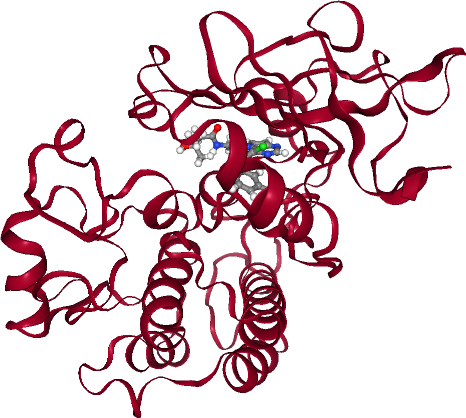

In [5]:
view._display_image()

### Alignment

Although barely noticable in the visualization of this rather short trajectory, depending on the used simulation package/settings proteins can rotate and translate during simulation. This can complicate visual inspection of the trajectory and usually requires an alignment as as prior step to analysis. A common selection for aligning a trajectory on is the protein. Thus, the protein will not deviate from the center and not rotate allowing the observation of unbinding events or conformational changes. The [MDAnalysis](https://docs.mdanalysis.org/stable/index.html) framework allows for easy alignment on an atom selection with strings and has built-in simple selection keywords as well, for example "protein", which selects all residues usually belonging to the protein. In the next step, we will align the trajectory (mobile) onto the protein of the first frame (reference, first frame is automatically chosen). 

In [6]:
# in_memory=True is needed to actually modify the loaded trajectory
# if the trajectory is too big for memory, one can write out the aligned trajectory and reload it into a new universe
alignment = align.AlignTraj(mobile=u, reference=u, select='protein', in_memory=True)
alignment.run()

In [7]:
view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=99)

In [8]:
view.render_image(trim=True, factor=2, transparent=True);

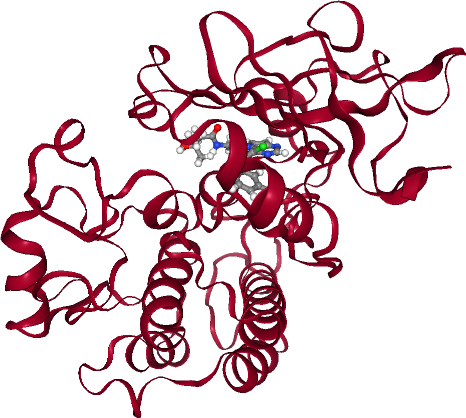

In [10]:
view._display_image()

### RMSD of protein and ligand

Protein and ligand are clearly distinguishable in the animation. However, it is hard to estimate if ligand or protein actually significantly change their position/conformation. Hence, we will evaluate the relative movement using a more suffisticated method, the calculation of the RMSD. We will thereby focus on different portions of the system (backbone, protein and ligand). The ligand is best selected by its distinct residue name. In this case, we know it is the inhibitor 03P, but we could also find the name from either inspecting the topology file or hovering the cursor over a ligand atom in the animation above. The atoms of our ligand are identified by the residue name "03P".

In [10]:
ligand_name = "03P"

#### RMSD over time

For plotting the RMSD easily, we can write a function that does the RMSD calculation for selected atomgroups from the universe. It returns a plotable Pandas Dataframe.

In [11]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """ Calulate the RMSD for selected atomgroups.
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection1: str
        Selection string for main atomgroup, also used during alignment.
    selection2: list of str, optional
        Selection strings for additional atomgroups.
    Returns
    -------
    rmsd_df: pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selections over time.
    """
    universe.trajectory[0]
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref,
                             select=selection1, groupselections=selection2)
    rmsd_analysis.run()
    columns = [selection1, *selection2] if selection2 else [selection1]
    rmsd_df = pd.DataFrame(np.round(rmsd_analysis.rmsd[:, 2:],2),
                           columns=columns)
    rmsd_df.index.name = "frame"
    return rmsd_df

Run the function with selections for the whole protein, the protein backbone atoms and the ligand to calculate the RMSD for the molecules during the interaction. During the calculation the molecule will be superimposed to the first frame along the backbone of the protein.

In [12]:
rmsd = rmsd_for_atomgroups(u, "backbone", ["protein", "resname " + ligand_name])
rmsd.head()

,backbone,protein,resname 03P
frame,,,
0,0.00,0.00,0.00
1,0.83,1.12,1.72
2,0.96,1.28,1.62
3,0.99,1.36,1.57
4,1.03,1.44,1.51


Then we plot the results.

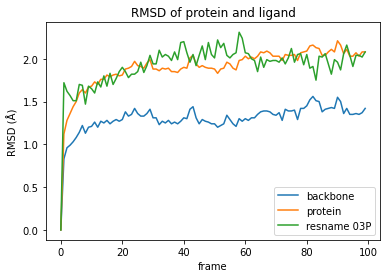

In [13]:
rmsd.plot(title="RMSD of protein and ligand")
plt.ylabel("RMSD (Å)");

The protein is superimposed along the backbone and thus there are only slight conformational changes during the reaction. The sidechains included in the whole protein lead to more movement when compared to the protein backbone.
The ligand, however, can move more freely and additionally to any conformational changes there might be directional movement involved, which is more likely the case if the RMSD values for the ligand are exceptionally high.

#### RMSD between frames

The plot before showed the distance at the given time compared to the initial state.
Now we calculate the differences between the frames and visualize them in a heatmap.

In [14]:
def RMSD_dist_frames(u, selection):
    """ Calculate the RMSD between all frames.
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection: str
        Selection string for the atomgroup to be investigated, also used during alignment.
    Returns
    -------
    array: np.ndarray
        Numpy array of RMSD values.
    """
    align.AlignTraj(u, u, select=selection, in_memory=True).run()
    matrix = diffusionmap.DistanceMatrix(u, select=selection).run()
    return matrix.dist_matrix

First, we calculate the distance matrices for protein and ligand using the function above.
Then we plot them side by side as heatmaps.

In [15]:
dist_matrix_protein = RMSD_dist_frames(u, "protein")
dist_matrix_ligand = RMSD_dist_frames(u, "resname " + ligand_name)

In order to achieve comparable heatmaps it is important to set minimal and maximal values to the same values in both plots. We set the minimal value to 0 and derive the upper bound from the distance matrices.

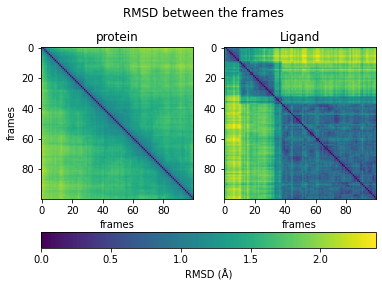

In [16]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("RMSD between the frames")
max_dist = max(np.amax(dist_matrix_ligand), np.amax(dist_matrix_protein))

img1 = ax[0].imshow(dist_matrix_protein, cmap="viridis", vmin=0, vmax=max_dist)
ax[0].title.set_text("protein")
ax[0].set_xlabel("frames")
ax[0].set_ylabel("frames")

img2 = ax[1].imshow(dist_matrix_ligand, cmap="viridis", vmin=0, vmax=max_dist)
ax[1].title.set_text("Ligand")
ax[1].set_xlabel("frames")

fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=.1, label="RMSD (Å)")

From the heatmaps we can conclude that the protein moves constantly and evenly between the states. The ligand 'jumps' between different states. Sometimes it can reach similar conformations repeatedly.

### Interaction analysis

Now we will look at the interaction between protein and ligand. Let's visualize the system again, including some more detail in the binding pocket. All residues in a 5 Å radius around the ligand are shown with atoms and bonds visible.

In [17]:
pocket_resids = set(u.select_atoms("(around 5 resname " + ligand_name + ") and protein").resids)
view2 = nv.show_mdanalysis(u)
view2.add_representation("licorice", selection=f"protein and ({' '.join([str(x) for x in pocket_resids])})")
view2

NGLWidget(max_frame=99)

In [18]:
view2.render_image(trim=True, factor=2, transparent=True);

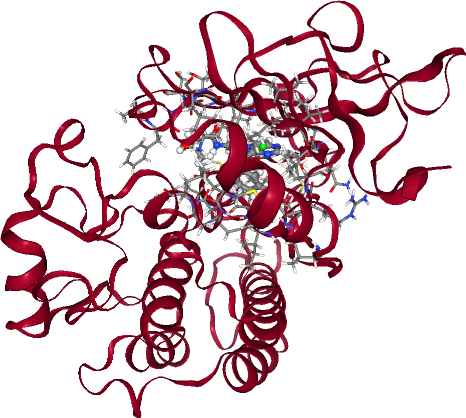

In [37]:
view2._display_image()

#### Atomic distances

We zoom in and look for interactions, that might be interesting. In this example, we want to look at the backbone nitrogen of methionine 793 coming in close contact with an aromatic ring of the ligand. Theoretically, the distances can be calculated for groups of atoms, as long as each group has the same number of atoms, but we want to look at distances between single atoms.
Single atom selections can be done unambiguously with the combination of residue id and atom name inside that residue, which we note down for the atoms in the bond we wish to analyze.

In [20]:
protein_residue_id = "793"
protein_atom_name = "N"
ligand_id = "1"
ligand_atom_name = "N4"

We select the atom groups used for our analysis. In our case they will contain one atom each.

In [21]:
atomgroup_protein = u.select_atoms(f"resid {protein_residue_id} and name {protein_atom_name}")
atomgroup_ligand = u.select_atoms(f"resid {ligand_id} and name {ligand_atom_name}")

Now we can calculate the distance between the atoms in the currently set frame of our universe.
The function returns an array of arrays, the first two values are the residue ids, but we are only interested in the third value, the distance.

In [22]:
distance = dist(atomgroup_protein, atomgroup_ligand)
print(f"The distance between residues {protein_residue_id} and {ligand_id} is {distance[2][0]:.2f} Å")

The distance between residues 793 and 1 is 3.52 Å


It is more meaningful if we observe the distance over time. To do this, we can iterate over the frames and calculate the distance for each of them.

In [23]:
distances = []
for _ in u.trajectory:
    distance = dist(atomgroup_protein, atomgroup_ligand)
    distances.append(distance[2][0])

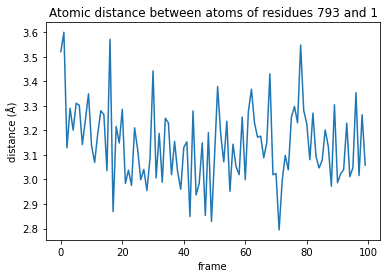

In [24]:
plt.plot(distances)
plt.ylabel('distance (Å)')
plt.xlabel('frame')
plt.title(f"Atomic distance between atoms of residues {protein_residue_id} and {ligand_id}")
plt.show()

#### Hydrogen bond analysis

The interaction between the ligand and the backbone nitrogen of methionine 793 we analyzed is actually a hydrogen bond. The nitrogen of the backbone from methionine is acting as the donor, the nitrogen in the aromatic ring of the ligand is the acceptor.
We go back to the visualization to get the unique name of the hydrogen forming the bond .Then we can use the hydrogen bond analysis capability from [MDAnalysis](https://docs.mdanalysis.org/1.0.0/documentation_pages/analysis/hydrogenbonds.html) to determine the characteristic distances and angles for the hydrogen bond. The hydrogen bond analysis covers all frames without manual iteration and is convenient to plot.

In [25]:
hydrogen_name = "H"

In [26]:
def run_hydrogenbond_analysis(universe, donor_resid, donor_atom, hydrogen, acceptor_resid, acceptor_atom,
                              h_cutoff=1.2, a_cutoff=3.0, angle_cutoff=120):
    """ Perform and Hydrogen Bond Analysis between selcted atomgroups.
    Return the data as readable, formatted Data Frame.
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    donor_resid: str
        Residue Id of residue containing donor atom in MDAnalysis Universe.
    donor_atom: str
        Name of the donor atom in the MDAnalysis Universe.
    hydrogen: str
        Index of acceptor atom in the MDAnalysis Universe.
    acceptor_resid: str
        Residue Id of residue containing acceptor atom in the MDAnalysis Universe.
    acceptor_atom: str
        Name of the acceptor atom in the MDAnalysis Universe.
    h_cutoff: float, optional
        Distance cutoff used for finding donor-hydrogen pairs.
    a_cutoff: float, optional
        Distance cutoff for hydrogen bonds.
    angle_cutoff: int, optional
        D-H-A angle cutoff for hydrogen bonds.
    Returns
    -------
    bond : pandas.core.frame.DataFrame
        DataFrame containing hydrogen bond information over time.
    """
    #Set up and run un the hydrogenbond analysis
    hbonds = HBA(universe=universe,
                 donors_sel="resid " + donor_resid + " and name " + donor_atom,
                 hydrogens_sel="resid " + donor_resid + " and name " + hydrogen,
                 acceptors_sel="resid " + acceptor_resid + " and name " + acceptor_atom,
                 d_h_cutoff=h_cutoff,
                 d_a_cutoff=a_cutoff,
                 d_h_a_angle_cutoff=angle_cutoff)
    hbonds.run()
    
    bond = pd.DataFrame(np.round(hbonds.hbonds,2)) #extract bond data
    #name columns (according to MDAnalysis function description)
    bond.columns = ["frame", "donor_index", "hydrogen_index",
                    "acceptor_index", "distance", "angle"]
    #set frame as the index
    bond['frame'] = bond['frame'].astype(int)
    bond.set_index("frame", inplace=True, drop=True)
    return bond

We run the hydrogen bond analysis using our function, which returns it in a practical DataFrame.

In [27]:
bond = run_hydrogenbond_analysis(
    u, protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
17,1483.0,1484.0,5529.0,2.87,144.73
21,1483.0,1484.0,5529.0,2.98,162.87
23,1483.0,1484.0,5529.0,2.98,173.41
26,1483.0,1484.0,5529.0,3.00,175.31
28,1483.0,1484.0,5529.0,2.95,163.73


In the table we can see that the bond is only recognized in some frames during the simulation. 

The used module searches for hydrogen bonds with strict constraints. Using default settings, the bond is cut every time the distance is larger than 3Å between donor and acceptor or larger than 1.2Å between donor and hydrogen or if the angle is smaller than 120°. The bond will not be included during frames where the constraints are not met.

To see the development of the bond over the entire simulation we can change those thresholds to detect the bond in its "weaker" states.
The angle seems sufficiently high, as opposed to the distance which is close to the 3Å cutoff distance. Thus, we try the analysis again with a higher cutoff distances of 5Å for the donor and acceptor distance.

In [28]:
bond = run_hydrogenbond_analysis(
    u, protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name, a_cutoff=5.0)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
0,1483.0,1484.0,5529.0,3.52,166.39
1,1483.0,1484.0,5529.0,3.60,145.63
2,1483.0,1484.0,5529.0,3.13,173.95
3,1483.0,1484.0,5529.0,3.29,151.99
4,1483.0,1484.0,5529.0,3.20,170.21


Now, we plot the bond.

In [29]:
def plot_hydrogen_bond_over_time(bond):
    """ Plot the distance and degree of a chosen hydrogen bond over time.
    Peaks in angle and dips in distance represent moments of strong binding.
    Parameters
    ----------
    bond: pandas.core.frame.DataFrame
        Hydrogenbond analysis bond data with named columns.
    """
    
    donor_index = bond.iloc[0].donor_index
    acceptor_index = bond.iloc[0].acceptor_index
    
    #Add values for missing frames for gapless plotting
    bond = bond.reindex(np.arange(0,99))

    #plot the data
    fig = plt.figure()
    distance = bond.distance.plot(
        title=f'H-Bond between donor {donor_index} and acceptor {acceptor_index}',
        style='o-', x="frame")
    distance.set_ylabel('distance (Å)')
    distance.set_xlabel('frame')
    angle = bond.angle.plot(secondary_y=True, style='o-', x="frame")
    angle.set_ylabel('angle (°)')
    angle.set_xlabel('frame')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1),
           bbox_transform=distance.transAxes)
    plt.show()

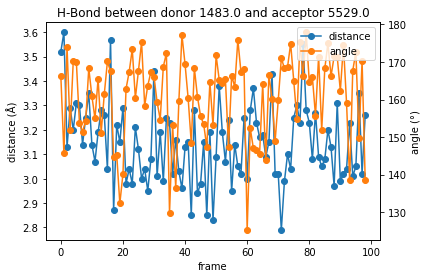

In [30]:
plot_hydrogen_bond_over_time(bond)

## Discussion

There are various ways to analyze MD Simulations. In this talktorial, we explored only a small fraction of available methods to give the user first insights. Some methods are more straightforward, like the visualization of the system or the calculation of the RMSD, while others require more finesse. Especially the hydrogen bond analysis is yet dependent on manual input and tweaking. But with further advancements in the field, we can expect the frameworks to become more and more refined.

The MD simulation used during analysis is actually too short to provide statistical significant data on binding and unbinding events or even conformational changes of the protein or ligand. To make full use of the capabilities of MD simulations one needs access to high performance clusters. Great examples on insights gained from MD simulations can be found on the [webpage](https://foldingathome.org/) of the folding at home consortium, which connects computers world wide to address pressing scientific challenges.

## Quiz

- Which hydrogen bond would you consider the strongest?
    - A: donor acceptor distance - 3.5 A, donor hydogen acceptor angle - 180 °
    - B: donor acceptor distance - 2.7 A, donor hydogen acceptor angle - 170 °
    - C: donor acceptor distance - 3.2 A, donor hydogen acceptor angle - 150 °
- Try to align the trajectory on the ligand. How does this affect the RMSD plots?
- Choose a second pair of atoms and analyse the interactions.
- Are you able to implement a function to calculate the root mean square fluctuations (RMSF) of protein residues?